In [0]:
import pyspark.sql.functions as F
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, CountVectorizer, StopWordsRemover, PCA, ElementwiseProduct
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.sql.types import DoubleType
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
raw_df = spark.read.format("delta").load("/user/hive/warehouse/scientific_publications")
display(raw_df.limit(100))

_id abstract authors doi fos isbn issn issue keywords lang n_citation page_end page_start pdf references title url venue volume year 53e99784b7602d9701f3e3f5 null null null null null null null List() en 0 null null null null 3GIO. null List(null, null, null, null, null, null, null, null, null, null, null, null, 0) null 2011 53e99784b7602d9701f3e133 Drought is the first place in all the natural disasters in the world. It is especially serious in North China Plain. In this paper, different soil water content control levels at winter wheat growth stages are performed on Gucheng Ecological-Meteorological Integrated Observation Experiment Station of CAMS, China. Some canopy parameters, including growth conditions, dry weight, physiological parameters and hyperspectral reflectance, are measured from erecting stage to milk stage for winter wheat in 2009. The relationship between canopy parameters and soil relative moisture, canopy water content and water indices of winter wheat are established. The results show that some parameters, such as SPAD and dry weight of leaves, decrease with the increasing of soil relative moisture, while other parameters, including dry weight of caudexes, above ground dry weight, height, photosynthesis rate, intercellular CO 2 concentration, stomatal conductance and transpiration rate, increase corresponding to the soil relative moisture. Obvious linear relationship between stomatal conductance and transpiration rate is established with 45 samples, which R2 reaches to 0.6152. Finally, the fitting equations between canopy water content and water indices are regressed with b5, b6 and b7 of MODIS bands. The equations are best with b7 and worst with b5. So the fitting equations with b7 can be used to inverse the canopy water content of winter wheat using MODIS or other remote sensing images with similar bands range to MODIS in Hebei Province. © 2011 IEEE. List(List(53f45728dabfaec09f209538, null, null, null, Peijuan Wang, null, null, null, null, null, null, null, null, null, null), List(5601754345cedb3395e59457, null, null, null, Jiahua Zhang, null, null, null, null, null, null, null, null, null, null), List(53f38438dabfae4b34a08928, null, null, null, Donghui Xie, null, null, null, null, null, null, null, null, null, null), List(5601754345cedb3395e5945a, null, null, null, Yanyan Xu, null, null, null, null, null, null, null, null, null, null), List(53f43d25dabfaeecd6995149, null, null, null, Yun Xu, null, null, null, null, null, null, null, null, null, null)) 10.1109/IGARSS.2011.6049503 List(Agronomy, Moisture, Hydrology, Environmental science, Dry weight, Water content, Stomatal conductance, Transpiration, Irrigation, Soil water, Canopy) null List(canopy parameters, canopy spectrum, different soil water content control, winter wheat, irrigation, hydrology, radiometry, moisture, indexes, vegetation, indexation, dry weight, soil moisture, water content, indexing terms, spectrum, natural disaster) en 0 1933 1930 null null The relationship between canopy parameters and spectrum of winter wheat under different irrigations in Hebei Province. List(http://dx.doi.org/10.1109/IGARSS.2011.6049503) List(53a7297d20f7420be8bd4ae7, null, null, International Geoscience and Remote Sensing Symposium, null, null, null, IGARSS, null, null, null, null, 0) null 2011 53e99784b7602d9701f3e151 List(List(53f46797dabfaeb22f542630, null, null, null, Jairo Rocha, null, null, null, null, null, null, null, null, null, null), List(54328883dabfaeb4c6a8a699, null, null, null, Theo Pavlidis, null, null, null, null, null, null, null, null, null, null)) 10.1109/ICDAR.1993.395663 List(Intelligent character recognition, Pattern recognition, Computer science, Feature (computer vision), Document processing, Handwriting recognition, Optical character recognition, Feature extraction, Feature (machine learning), Artificial intelligence, Intelligent word recognition) List(handwriting recognition, prototypes, image segmentation, computer science, expert s

In [0]:
filtered_df = (raw_df.withColumn("title_word_count", F.size(F.split("title", " "))).filter("title_word_count > 1").filter("lang == 'en'")
                .withColumn("abs_word_count", F.size(F.split("abstract", " "))).filter("abs_word_count > 1")
                .select("_id", "abstract", "title", "keywords", "fos")
                #.select("_id", "abstract", "title", F.explode(F.col("authors")).alias("authors_exp"), "year", "keywords", "fos")
                #.select("_id", "abstract", "title", F.col("authors_exp.name").alias("authors"), "year", "keywords", "fos")
                #.groupBy(["title", "abstract", "year", "keywords", "fos"]).agg(F.concat_ws(", ", F.collect_list(
                #  F.col("authors"))).alias("authors"))
                )
display(filtered_df.limit(100))

_id abstract title keywords fos 53e99967b7602d97021a560a Ab initio predictions of secondary structures in proteins have to combine local predictions, based on short fragments of the protein sequence, with consistency restrictions, as not all locally plausible predictions may be simultaneously true. We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure. Consistency of fixed-sized pieces of secondary structures is the easiest to approximate and we formalize it as 1-2 matching problem. Consistency of entire secondary structures is a version of set packing. We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space. Every problem that we investigated is MAX-SNP hard and it has a constant factor approximation. Computational experience suggests that in biological instances, we can find nearly optimal solutions using heuristics. Consistent Sets of Secondary Structures in Proteins List(Secondary Structure, Maximum Weight, Local Prediction, Horizontal Edge, Connector Edge) List(Algorithm, Heuristics, Set packing, Metric space, Ab initio, Hydrogen bond, Protein secondary structure, Mathematics, Protein structure, Theory of computation) 53e99960b7602d97021a53fa In this work a new method of feature extraction for an interactive and adaptive recognizer for on-line handwritten alphanumeric characters has been proposed. The system is suitable for use in conjunction with magnetic pen based devices for inputting data to a data processing system or a computer terminal. The features are extracted from dynamically changing locations of the writing device. The new method of feature extraction is simple, computationally light and fast enough for adaptive on-line use. Extracted features are robust with respect to all possible distortions like shape, size, and orientation. For simulation experiment, numerals 0-9 are used. A single hidden layer feed forward neural network trained by Quickprop algorithm, a variation of error back propagation is used for recognition. Very high recognition rates, even for highly distorted samples have been achieved confirming high generalization capability of the extracted feature set. A new feature extraction technique for on-line recognition of handwritten alphanumeric characters List(adaptive on-line use, data processing system, feature extraction, inputting data, on-line recognition, handwritten alphanumeric character, feature set, new feature extraction technique, extracted feature, adaptive recognizer, new method, high generalization capability, high recognition rate, feed forward neural network, error back propagation, simulation experiment, data processing, artificial neural network) List(Alphanumeric, Feedforward neural network, Pattern recognition, Computer science, Data processing system, Feature extraction, Feature (machine learning), Artificial intelligence, Backpropagation, Artificial neural network, Quickprop) 53e99960b7602d97021a541f The rapid evolution of the telecommunication domain increases the performance of different access networks continuously. New services, especially in the domain multimedia content distribution, require higher and higher bandwidth at the user's and service provider's side. Multimedia services like Video on Demand, IPTV, and live streaming were introduced in the past and are still improved in quality and quantity. Multimedia streams and Peer to Peer P2P file sharing dominates the worldwide Internet traffic nowadays and will continue further Schulze, 2009. The user acceptance of enjoying multimedia content over the Internet will grow steadily together with the increasing quality of the available multimedia content. Network operators and service providers have to face the growths by increasing their service platform with higher performance and bandwidth or introd

#### Dataset exploration and analysis

Number of records: 167165
Average abstract length: 850.3715430861723


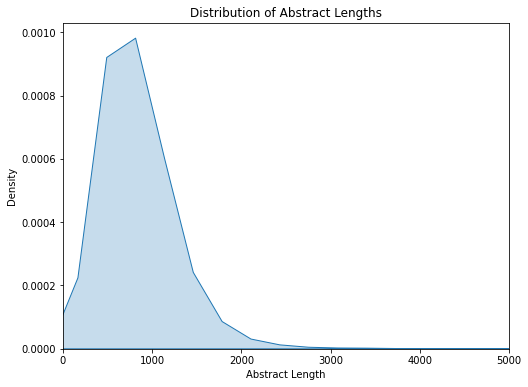

In [0]:
record_count = filtered_df.select(F.count("*")).first()[0]
print("Number of records:", record_count)

# Explore the abstract column
avg_abstract_length = filtered_df.select(F.avg(F.length(F.col("abstract")))).first()[0]
print("Average abstract length:", avg_abstract_length)

abstract_lengths = filtered_df.select(F.length("abstract").alias("abstract_length"))
length_data = abstract_lengths.toPandas().dropna()

# Plot the distribution of abstract lengths using KDE
plt.figure(figsize=(8, 6))
sns.kdeplot(data=length_data, x="abstract_length", shade=True)
plt.xlabel("Abstract Length")
plt.ylabel("Density")
plt.title("Distribution of Abstract Lengths")
plt.xlim(0, 5000)  # Set the x-axis limits to accommodate the full range of values
plt.show()

In [0]:
# Tokenize the "abstract" column
tokenizer = Tokenizer(inputCol="abstract", outputCol="words")
words_df = tokenizer.transform(filtered_df)

stopwords_remover = StopWordsRemover(inputCol="words", outputCol="filtered_words")
filtered_words_df = stopwords_remover.transform(words_df)

# Compute word counts and find the most common words after removal of stopwords
word_counts = filtered_words_df.select(F.explode("filtered_words").alias("word")).groupBy("word").count()
most_common_words = word_counts.orderBy(F.desc("count")).limit(10)

display(most_common_words)

word count 99876 paper 61207 data 57626 based 51370 using 50521 system 49730 model 45547 results 44866 new 44237 used 41827

In [0]:
# Explode keywords column and collect unique keywords using Spark functions
unique_keywords = (
    filtered_df
    .select(F.explode(F.col("keywords")).alias("keyword"))
    .groupBy("keyword")
    .agg(F.count("keyword").alias("count"))
    .select("keyword")
    .orderBy(F.desc("count"))
    .rdd.flatMap(lambda x: x)
    .collect()
)

# Convert the unique keywords to a list
unique_keywords_list = list(unique_keywords)

# Print the unique keywords
print("Unique Keywords:")
for keyword in unique_keywords_list:
    print(keyword)

Unique Keywords:
data mining
computer science
satisfiability
real time
internet
computational complexity
feature extraction
software engineering
indexing terms
information retrieval
neural network
algorithms
protocols
machine learning
data structure
indexation
quality of service
algorithm design and analysis
computer vision
computational modeling
image segmentation
programming language
computer architecture
optimization
application software
testing
image processing
software development
security
hardware
genetic algorithm
scheduling
robustness
chip
information technology
mathematical model
information system
wireless sensor networks
probability
artificial intelligence
pattern recognition
lower bound
statistical analysis
software systems
user interface
signal processing
upper bound
real time systems
visualization
cryptography
graph theory
mobile computing
web service
distributed computing
decoding
distributed system
parallel processing
databases
resource allocation
software architecture


<Figure size 720x432 with 0 Axes>

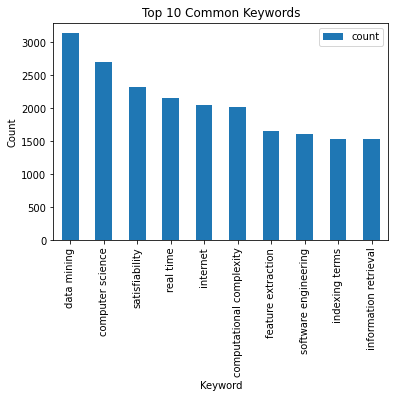

In [0]:
# Explode keywords column and filter out null values
all_keywords = (
    filtered_df
    .select(F.explode(F.col("keywords")).alias("keyword"))
    .filter(F.col("keyword").isNotNull())
)

# Group by keyword and count occurrences
common_keywords = (
    all_keywords
    .groupBy("keyword")
    .agg(F.count("*").alias("count"))
    .orderBy(F.desc("count"))
    .limit(10)
)

# Collect the common keywords as a Pandas DataFrame
common_keywords_pd = common_keywords.toPandas()

# Plot the most common keywords if available
if not common_keywords_pd.empty:
    plt.figure(figsize=(10, 6))
    common_keywords_pd.plot(kind='bar', x='keyword', y='count')
    plt.xlabel("Keyword")
    plt.ylabel("Count")
    plt.title("Top 10 Common Keywords")
    plt.show()
else:
    print("No common keywords found.")

In [0]:
# Convert the 'fos' column to a semicolon-separated string
fos_string = filtered_df.select(F.concat_ws(';', F.col('fos')).alias('fos_string'))

# Get the unique fields of study
unique_fos = fos_string.select('fos_string').distinct().rdd.flatMap(lambda x: x).collect()

# Print the unique fields of study
print('Unique Fields of Study:')
for fos in unique_fos:
    print(fos)


Unique Fields of Study:
Logic synthesis;Integrated circuit layout;Computer architecture;Logic gate;Computer science;CMOS;Application-specific integrated circuit;NAND logic;Standard cell;Design for manufacturability
Simulated annealing;Power domains;Power optimization;Power network design;Algorithm design;Network synthesis filters;Design tool;Electronic engineering;Modified nodal analysis;Engineering
Content analysis;Systems theory;Sociocybernetics;Visualization;Computer science;Social network analysis;Communication studies;Natural language processing;Artificial intelligence;Latent semantic analysis;Recursion
Interaction technique;User experience design;Computer science;Augmented reality;Computer-mediated reality;Human–computer interaction;User interface;Natural mapping;Natural user interface;Interactive systems engineering
Interleaved memory;Virtual memory;Computer science;Thrashing;Memory management;Paging;Flat memory model;Overlay;Demand paging;Operating system
Continuous function;Di

Field of Study counts:


fos_count count -1 10890 0 593 1 389 2 939 3 2171 4 3280 5 4631 6 6254 7 8215 8 9790 9 11067 10 46623 11 50063 12 9428 13 899 14 555 15 472 16 363 17 214 18 170 19 82 20 38 21 18 22 9 23 2 24 3 26 1 27 1 28 1 34 2 36 2

Common Fields of Study:


fos count Computer science 96559 Mathematics 38730 Artificial intelligence 28589 Algorithm 13730 Discrete mathematics 12864 Combinatorics 10744 Theoretical computer science 10264 Computer vision 9176 Computer network 8368 Engineering 8120

<Figure size 720x432 with 0 Axes>

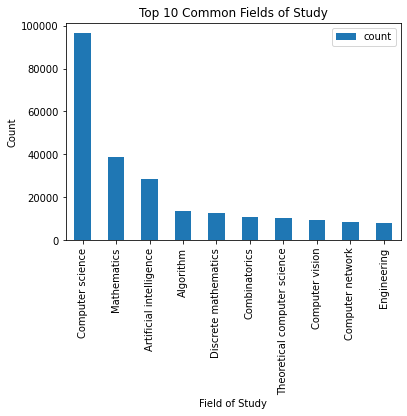

In [0]:
# Count the occurrences of each field of study
fos_counts = filtered_df.select(F.size(F.col('fos')).alias('fos_count'))
fos_counts_df = fos_counts.groupBy('fos_count').count().orderBy('fos_count')

print("Field of Study counts:")
display(fos_counts_df)

# Flatten the fos field and count the occurrences of each unique field
all_fos = filtered_df.select(F.explode(F.col('fos')).alias('fos')).filter(F.col('fos').isNotNull())
common_fos = all_fos.groupBy('fos').count().orderBy(F.col('count').desc()).limit(10)

print("Common Fields of Study:")
display(common_fos.limit(10))

# Convert Spark DataFrame to Pandas DataFrame for plotting
common_fos_pandas = common_fos.toPandas()

# Plot the most common fields of study
if not common_fos_pandas.empty:
    plt.figure(figsize=(10, 6))
    common_fos_pandas.plot(kind='bar', x='fos', y='count')
    plt.xlabel("Field of Study")
    plt.ylabel("Count")
    plt.title("Top 10 Common Fields of Study")
    plt.show()
else:
    print("No common fields of study found.")

#### Clustering

In [0]:
df_concatenated = filtered_df.withColumn("text", F.concat_ws(" ", 
                                                             filtered_df.title, 
                                                             filtered_df.abstract,
                                                             F.array_join(filtered_df.keywords, " "),
                                                             F.array_join(filtered_df.fos, " ")))\
                .withColumn('text', F.translate('text', "!()-[]{};:'\"\,<>./?@#$%^&*_~", ''))
display(df_concatenated.limit(25))

_id abstract title keywords fos text 53e99967b7602d97021a560a Ab initio predictions of secondary structures in proteins have to combine local predictions, based on short fragments of the protein sequence, with consistency restrictions, as not all locally plausible predictions may be simultaneously true. We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure. Consistency of fixed-sized pieces of secondary structures is the easiest to approximate and we formalize it as 1-2 matching problem. Consistency of entire secondary structures is a version of set packing. We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space. Every problem that we investigated is MAX-SNP hard and it has a constant factor approximation. Computational experience suggests that in biological instances, we can find nearly optimal solutions using heuristics. Consistent Sets of Secondary Structures in Proteins List(Secondary Structure, Maximum Weight, Local Prediction, Horizontal Edge, Connector Edge) List(Algorithm, Heuristics, Set packing, Metric space, Ab initio, Hydrogen bond, Protein secondary structure, Mathematics, Protein structure, Theory of computation) Consistent Sets of Secondary Structures in Proteins Ab initio predictions of secondary structures in proteins have to combine local predictions based on short fragments of the protein sequence with consistency restrictions as not all locally plausible predictions may be simultaneously true We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure Consistency of fixedsized pieces of secondary structures is the easiest to approximate and we formalize it as 12 matching problem Consistency of entire secondary structures is a version of set packing We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space Every problem that we investigated is MAXSNP hard and it has a constant factor approximation Computational experience suggests that in biological instances we can find nearly optimal solutions using heuristics Secondary Structure Maximum Weight Local Prediction Horizontal Edge Connector Edge Algorithm Heuristics Set packing Metric space Ab initio Hydrogen bond Protein secondary structure Mathematics Protein structure Theory of computation 53e99960b7602d97021a53fa In this work a new method of feature extraction for an interactive and adaptive recognizer for on-line handwritten alphanumeric characters has been proposed. The system is suitable for use in conjunction with magnetic pen based devices for inputting data to a data processing system or a computer terminal. The features are extracted from dynamically changing locations of the writing device. The new method of feature extraction is simple, computationally light and fast enough for adaptive on-line use. Extracted features are robust with respect to all possible distortions like shape, size, and orientation. For simulation experiment, numerals 0-9 are used. A single hidden layer feed forward neural network trained by Quickprop algorithm, a variation of error back propagation is used for recognition. Very high recognition rates, even for highly distorted samples have been achieved confirming high generalization capability of the extracted feature set. A new feature extraction technique for on-line recognition of handwritten alphanumeric characters List(adaptive on-line use, data processing system, feature extraction, inputting data, on-line recognition, handwritten alphanumeric character, feature set, new feature extraction technique, extracted feature, adaptive recognizer, new method, high generalization capability, h

In [0]:
#additional stopwords
stop_words = [ 'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure','rights',
'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier',
'PMC', 'CZI', 'www', '']

In [0]:
#Build a preprocessing pipeline
tokenizer = Tokenizer(inputCol="text", outputCol="tokens")
stop_words.extend(StopWordsRemover().getStopWords())
remover = StopWordsRemover(inputCol="tokens", outputCol="stopWordsRemovedTokens", stopWords=stop_words)
hashingTF = HashingTF(inputCol="stopWordsRemovedTokens", outputCol="rawFeatures", numFeatures=2048)
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=5)
pipeline = Pipeline(stages=[tokenizer, remover, hashingTF, idf])

In [0]:
preprocessing_model = pipeline.fit(df_concatenated)

In [0]:
preprocessed_df = preprocessing_model.transform(df_concatenated)
preprocessed_df.cache()

Out[46]: DataFrame[_id: string, abstract: string, title: string, keywords: array<string>, fos: array<string>, text: string, tokens: array<string>, stopWordsRemovedTokens: array<string>, rawFeatures: vector, features: vector]

In [0]:
display(preprocessed_df.limit(25))

_id abstract title keywords fos text tokens stopWordsRemovedTokens rawFeatures features 53e99967b7602d97021a560a Ab initio predictions of secondary structures in proteins have to combine local predictions, based on short fragments of the protein sequence, with consistency restrictions, as not all locally plausible predictions may be simultaneously true. We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure. Consistency of fixed-sized pieces of secondary structures is the easiest to approximate and we formalize it as 1-2 matching problem. Consistency of entire secondary structures is a version of set packing. We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space. Every problem that we investigated is MAX-SNP hard and it has a constant factor approximation. Computational experience suggests that in biological instances, we can find nearly optimal solutions using heuristics. Consistent Sets of Secondary Structures in Proteins List(Secondary Structure, Maximum Weight, Local Prediction, Horizontal Edge, Connector Edge) List(Algorithm, Heuristics, Set packing, Metric space, Ab initio, Hydrogen bond, Protein secondary structure, Mathematics, Protein structure, Theory of computation) Consistent Sets of Secondary Structures in Proteins Ab initio predictions of secondary structures in proteins have to combine local predictions based on short fragments of the protein sequence with consistency restrictions as not all locally plausible predictions may be simultaneously true We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure Consistency of fixedsized pieces of secondary structures is the easiest to approximate and we formalize it as 12 matching problem Consistency of entire secondary structures is a version of set packing We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space Every problem that we investigated is MAXSNP hard and it has a constant factor approximation Computational experience suggests that in biological instances we can find nearly optimal solutions using heuristics Secondary Structure Maximum Weight Local Prediction Horizontal Edge Connector Edge Algorithm Heuristics Set packing Metric space Ab initio Hydrogen bond Protein secondary structure Mathematics Protein structure Theory of computation List(consistent, sets, of, secondary, structures, in, proteins, ab, initio, predictions, of, secondary, structures, in, proteins, have, to, combine, local, predictions, based, on, short, fragments, of, the, protein, sequence, with, consistency, restrictions, as, not, all, locally, plausible, predictions, may, be, simultaneously, true, we, use, the, fact, that, secondary, structures, are, patterns, of, hydrogen, bonds, and, that, a, single, residue, can, participate, in, hydrogen, bonds, of, at, most, one, secondary, structure, consistency, of, fixedsized, pieces, of, secondary, structures, is, the, easiest, to, approximate, and, we, formalize, it, as, 12, matching, problem, consistency, of, entire, secondary, structures, is, a, version, of, set, packing, we, also, investigate, how, to, form, a, simple, problem, if, we, add, the, requirement, that, the, secondary, structure, and, the, loops, that, connect, them, fit, together, in, a, metric, space, every, problem, that, we, investigated, is, maxsnp, hard, and, it, has, a, constant, factor, approximation, computational, experience, suggests, that, in, biological, instances, we, can, find, nearly, optimal, solutions, using, heuristics, secondary, structure, maximum, weight, local, prediction, horizontal, edge, connector, edge, algorithm, he

In [0]:
#Dimensionality reduction with PCA
pca = PCA(k=10, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(preprocessed_df)
#explained_variance_ratios = pca_model.explainedVariance.toArray()
#cumulative_variance_ratios = explained_variance_ratios.cumsum()

#target_variance_ratio = 0.95
#k = len(cumulative_variance_ratios[cumulative_variance_ratios < target_variance_ratio]) + 1

#pca.setK(k)
pca_df = pca_model.transform(preprocessed_df)
pca_df.cache()

Out[57]: DataFrame[_id: string, abstract: string, title: string, keywords: array<string>, fos: array<string>, text: string, tokens: array<string>, stopWordsRemovedTokens: array<string>, rawFeatures: vector, features: vector, pca_features: vector]

In [0]:
print(k)
display(pca_df.limit(25))

9


_id abstract title keywords fos text tokens stopWordsRemovedTokens rawFeatures features pca_features 53e99967b7602d97021a560a Ab initio predictions of secondary structures in proteins have to combine local predictions, based on short fragments of the protein sequence, with consistency restrictions, as not all locally plausible predictions may be simultaneously true. We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure. Consistency of fixed-sized pieces of secondary structures is the easiest to approximate and we formalize it as 1-2 matching problem. Consistency of entire secondary structures is a version of set packing. We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space. Every problem that we investigated is MAX-SNP hard and it has a constant factor approximation. Computational experience suggests that in biological instances, we can find nearly optimal solutions using heuristics. Consistent Sets of Secondary Structures in Proteins List(Secondary Structure, Maximum Weight, Local Prediction, Horizontal Edge, Connector Edge) List(Algorithm, Heuristics, Set packing, Metric space, Ab initio, Hydrogen bond, Protein secondary structure, Mathematics, Protein structure, Theory of computation) Consistent Sets of Secondary Structures in Proteins Ab initio predictions of secondary structures in proteins have to combine local predictions based on short fragments of the protein sequence with consistency restrictions as not all locally plausible predictions may be simultaneously true We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure Consistency of fixedsized pieces of secondary structures is the easiest to approximate and we formalize it as 12 matching problem Consistency of entire secondary structures is a version of set packing We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space Every problem that we investigated is MAXSNP hard and it has a constant factor approximation Computational experience suggests that in biological instances we can find nearly optimal solutions using heuristics Secondary Structure Maximum Weight Local Prediction Horizontal Edge Connector Edge Algorithm Heuristics Set packing Metric space Ab initio Hydrogen bond Protein secondary structure Mathematics Protein structure Theory of computation List(consistent, sets, of, secondary, structures, in, proteins, ab, initio, predictions, of, secondary, structures, in, proteins, have, to, combine, local, predictions, based, on, short, fragments, of, the, protein, sequence, with, consistency, restrictions, as, not, all, locally, plausible, predictions, may, be, simultaneously, true, we, use, the, fact, that, secondary, structures, are, patterns, of, hydrogen, bonds, and, that, a, single, residue, can, participate, in, hydrogen, bonds, of, at, most, one, secondary, structure, consistency, of, fixedsized, pieces, of, secondary, structures, is, the, easiest, to, approximate, and, we, formalize, it, as, 12, matching, problem, consistency, of, entire, secondary, structures, is, a, version, of, set, packing, we, also, investigate, how, to, form, a, simple, problem, if, we, add, the, requirement, that, the, secondary, structure, and, the, loops, that, connect, them, fit, together, in, a, metric, space, every, problem, that, we, investigated, is, maxsnp, hard, and, it, has, a, constant, factor, approximation, computational, experience, suggests, that, in, biological, instances, we, can, find, nearly, optimal, solutions, using, heuristics, secondary, structure, maximum, weight, local, prediction, horizontal, edge, connector, edge, 

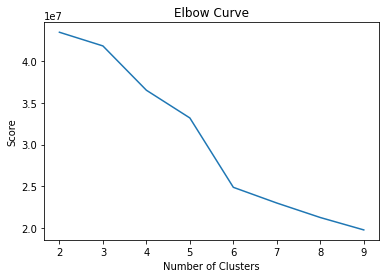

In [0]:
#Using elbow method to find the correct number of cluster
cost = np.zeros(10)

for k in range(2,10):
    kmeans = KMeans(featuresCol='pca_features', k=k, seed=3)
    model = kmeans.fit(pca_df)
    cost[k] = model.summary.trainingCost

# Plot the cost
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = [2,3,4,5,6,7,8,9]
df_cost.insert(0, 'cluster', new_col)

import pylab as pl
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [0]:
#6 clusters seem to be the best
kmeans = KMeans(featuresCol='pca_features', k=6, seed=3)
model = kmeans.fit(pca_df)
clustered_df = model.transform(pca_df)

In [0]:
display(clustered_df)

_id abstract title keywords fos text tokens stopWordsRemovedTokens rawFeatures features pca_features prediction 53e99967b7602d97021a560a Ab initio predictions of secondary structures in proteins have to combine local predictions, based on short fragments of the protein sequence, with consistency restrictions, as not all locally plausible predictions may be simultaneously true. We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure. Consistency of fixed-sized pieces of secondary structures is the easiest to approximate and we formalize it as 1-2 matching problem. Consistency of entire secondary structures is a version of set packing. We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space. Every problem that we investigated is MAX-SNP hard and it has a constant factor approximation. Computational experience suggests that in biological instances, we can find nearly optimal solutions using heuristics. Consistent Sets of Secondary Structures in Proteins List(Secondary Structure, Maximum Weight, Local Prediction, Horizontal Edge, Connector Edge) List(Algorithm, Heuristics, Set packing, Metric space, Ab initio, Hydrogen bond, Protein secondary structure, Mathematics, Protein structure, Theory of computation) Consistent Sets of Secondary Structures in Proteins Ab initio predictions of secondary structures in proteins have to combine local predictions based on short fragments of the protein sequence with consistency restrictions as not all locally plausible predictions may be simultaneously true We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure Consistency of fixedsized pieces of secondary structures is the easiest to approximate and we formalize it as 12 matching problem Consistency of entire secondary structures is a version of set packing We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space Every problem that we investigated is MAXSNP hard and it has a constant factor approximation Computational experience suggests that in biological instances we can find nearly optimal solutions using heuristics Secondary Structure Maximum Weight Local Prediction Horizontal Edge Connector Edge Algorithm Heuristics Set packing Metric space Ab initio Hydrogen bond Protein secondary structure Mathematics Protein structure Theory of computation List(consistent, sets, of, secondary, structures, in, proteins, ab, initio, predictions, of, secondary, structures, in, proteins, have, to, combine, local, predictions, based, on, short, fragments, of, the, protein, sequence, with, consistency, restrictions, as, not, all, locally, plausible, predictions, may, be, simultaneously, true, we, use, the, fact, that, secondary, structures, are, patterns, of, hydrogen, bonds, and, that, a, single, residue, can, participate, in, hydrogen, bonds, of, at, most, one, secondary, structure, consistency, of, fixedsized, pieces, of, secondary, structures, is, the, easiest, to, approximate, and, we, formalize, it, as, 12, matching, problem, consistency, of, entire, secondary, structures, is, a, version, of, set, packing, we, also, investigate, how, to, form, a, simple, problem, if, we, add, the, requirement, that, the, secondary, structure, and, the, loops, that, connect, them, fit, together, in, a, metric, space, every, problem, that, we, investigated, is, maxsnp, hard, and, it, has, a, constant, factor, approximation, computational, experience, suggests, that, in, biological, instances, we, can, find, nearly, optimal, solutions, using, heuristics, secondary, structure, maximum, weight, local, prediction, horizontal, edge, connec

In [0]:
#Fuction which recommends similar papers
def recommend_papers(title, N):
    record = clustered_df.filter(F.col("title") == title)

    rec_cluster = record.collect()[0]["prediction"]
    rec_vector = record.collect()[0]["features"]
    
    recommended_papers = (clustered_df
                          .filter((F.col("prediction") != rec_cluster) & (F.col("title") != title))
                          .rdd.map(lambda row: (row.title, float(row.features.dot(rec_vector))))
                          .toDF().select(F.col("_1").alias("title"),F.col("_2").alias("distance"))
                          .sort(F.col("distance").desc()).limit(N))
    
    return recommended_papers

In [0]:
title = "Paramecium: Assembling Raw Nodes into Composite Cells"
N = 5

display(recommend_papers(title, N))

title distance A numerical implementation of Komogorov's superpositions II 4790.4627288113015 Group morphology 4586.979118127241 Upgrading bottleneck constrained forests 3142.910156237069 Oral presentations. 2380.9647422928256 Programmable self-assembly. 2015.2865659381484